# Practical Machine Learning
# Lab 3


## SVM (Support Vector Machine)

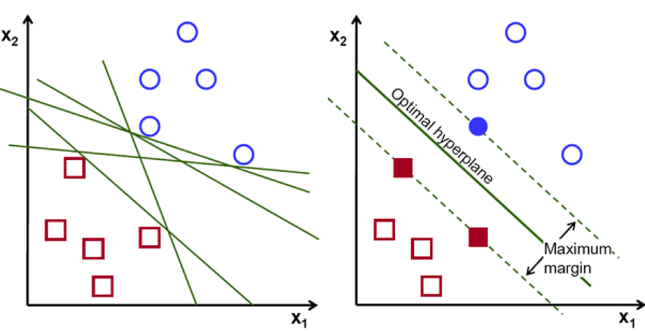
In the left side, we have some possible decision functions that correctly classify (separate) the two classes (blue circles and red squares). In the right side, we have the decision function of an SVM that chooses the maximal margin between the two classes. 

SVM is a ___binary___ classifier and because of that, it cannot solve multiclass tasks by default. But, there are two techniques that classify multiclass tasks.


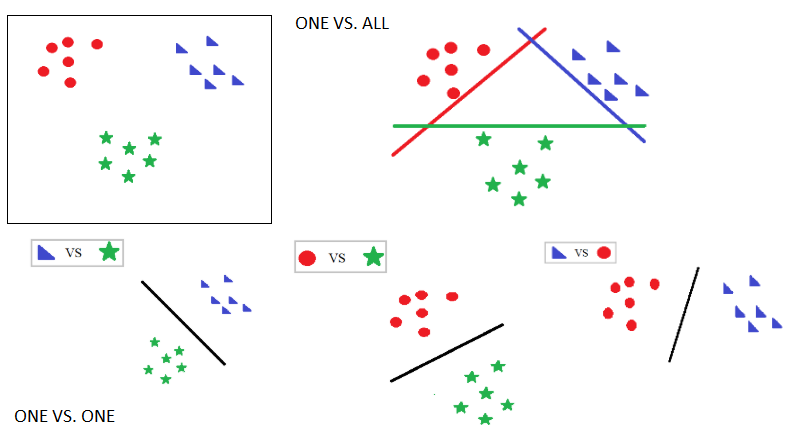
 
The first technique is __OneVsAll__:
    - using this approach K (number of classes) classifiers are trained, one classifier for each class in order to separate that class from the rest. The final label is given by the classifier with the maximum score.
    
The second technique is __OneVsOne__:
    - using this approch K * (K - 1) / 2 classifiers are trained, one classifier for each pair of two classes. The final label is given by the majority label.
    

In [1]:
from sklearn import svm # import the library

## Defining the SVM
model = SVC(C, kernel, gamma)

### The regularization parameter
C is the regularization parameter and controls the error of the classifier on the training set.
    - if C is big, a hyperplane with a small separation margin will be chosen, if this has better performance on the training set. (it can overfit).
    - if C is small, a hyperplane with a bigger separation margin will be chosen, even if this hyperplane does not separate the training set perfectly. (it can underfit). 
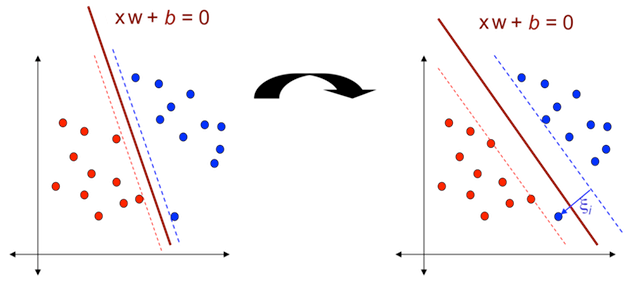
In the left it is used a bigger C, in the right it's used a smaller C and the hyperplane does not separate perfectly the training set.

### Kernel
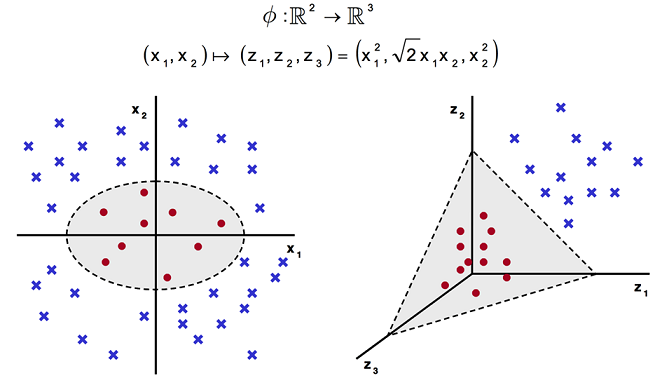

SVM is a __linear__ classifier, it cannot classify perfectly non-linear data. In order to separate non-linear data, SVM uses kernel functions.
A kernel function works as follows:
    - data is mapped in a Hilbert space with many dimensions.
    - linear decision functions are sought in that space.
    
Two of the most common kernel functions are:
$$Linear-kernel: K(u, v) = u^Tv$$
$$RBF-kernel: K(u, v) = exp(-gamma * \mid\mid u - v \mid\mid^2)$$

### Toy example SVM

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm # import the library

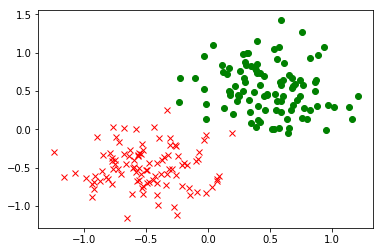

In [5]:
# load toy data
training_data = np.load('data/svm_train_data.npy')
training_labels = np.load('data/svm_train_labels.npy')

# plot the data
for i in range(training_data.shape[0]):
    if training_labels[i] == 0:
        plt.plot(training_data[i, 0], training_data[i, 1], 'og')
    else:
        plt.plot(training_data[i, 0], training_data[i, 1], 'xr')
plt.show()

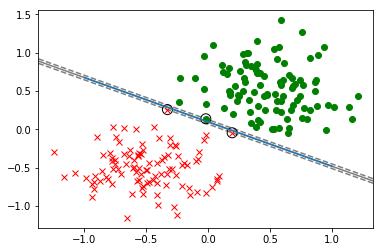

In [14]:
# train a SVM model
C_param = 1000 # change this parameter to [0.01, 1, 10, 1000] and try to explain the effect of the parameter
svm_model = svm.SVC(C_param, "linear") # define the model
svm_model.fit(training_data, training_labels) # train
predicted_labels_train = svm_model.predict(training_data) # predit

X = np.linspace(-1, 1, 1000)
Y = -(X * svm_model.coef_[0, 0] + svm_model.intercept_) / svm_model.coef_[0, 1]
for i in range(training_data.shape[0]):
    if training_labels[i] == 0:
        plt.plot(training_data[i, 0], training_data[i,1],'og')
    else:
        plt.plot(training_data[i, 0], training_data[i, 1],'xr')
        
        
        
# plotting
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')        
        
plt.plot(X,Y) 
plt.show()
